In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [33]:
plots_dir = '/hpc/compgen/users/mpages/babe/plot_notebooks/task_performance_analysis'

In [2]:
model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/inter'
reads_split_file = '/hpc/compgen/users/mpages/babe/doc/splits/test_reads_species.csv'
reads_per_split = '/hpc/compgen/users/mpages/babe/doc/splits/reads_per_task.csv'

spe_difficulty = pd.read_csv(reads_per_split)
spe_difficulty = spe_difficulty[spe_difficulty['Task'] == 'inter-species']
difficulties = np.unique(spe_difficulty['Difficulty'])

reads_split = pd.read_csv(reads_split_file, header = None)
read_to_spe_mapper = dict()
for read_id, species in zip(reads_split[0], reads_split[1]):
    read_to_spe_mapper[read_id] = species

In [3]:
# for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):

#     diff_split = dict()
#     for d in difficulties:
#         diff_split[d] = list()
#     diff_split['human'] = list()

#     df = pd.read_csv(
#         os.path.join(
#             model_dir_global,
#             modelname,
#             'basecalls_400_1_0.1_evaluation.csv'
#         ),
#         header = 0,
#         comment = '#'
#     )
    
#     for i, row in df.iterrows():
#         spe = read_to_spe_mapper[row['read_id']]
#         diff = spe_difficulty.loc[spe_difficulty['Species'] == spe, 'Difficulty']
#         if len(diff) == 0:
#             diff = spe_difficulty.loc[spe_difficulty['Species'] == spe.replace('_', ' '), 'Difficulty']
#         diff_split[diff.item()].append(row)
#         if spe == 'Homo_sapiens':
#             diff_split['human'].append(row)

    

#     for d, v in diff_split.items():
#         if os.path.exists(os.path.join(model_dir_global, modelname, 'd'+str(d), 'evaluation.csv')):
#             continue
#         try:
#             os.mkdir(os.path.join(model_dir_global, modelname, 'd'+str(d)))
#         except:
#             pass
#         df = pd.concat(v, axis = 1)
#         df = df.transpose()
#         with open(os.path.join(model_dir_global, modelname, 'd'+str(d), 'evaluation.csv'), 'w') as f:
#             f.write('#'+modelname+'\n')
#         df.to_csv(os.path.join(model_dir_global, modelname, 'd'+str(d), 'evaluation.csv'), index=False, header = True, mode = 'a')

#         os.system("python /hpc/compgen/users/mpages/nanopore_benchmark/report.py --evaluation-file "+os.path.join(model_dir_global, modelname, 'd'+str(d), 'evaluation.csv') + ' --output-dir ' + os.path.join(model_dir_global, modelname, 'd'+str(d), 'reports') + ' --overwrite')  

    
        
    

In [4]:

all_results = dict()
for d in ['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']:
    all_results[d] = list()
for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    for d in ['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']:
        try:
            df = pd.read_csv(
                os.path.join(
                    model_dir_global,
                    modelname,
                    d,
                    'reports',
                    'report_'+modelname+'_singlevalues.csv'
                ),
                header = 0,
                comment = '#'
            )
            all_results[d].append(df)
        except FileNotFoundError:
            continue

allall_results = list()

for d, l in all_results.items(): 

    df = pd.concat(l)
    df = df.rename(columns = {'model':'modelname'})
    df = df.pivot(index='modelname', columns='metric', values='value')

    df = df.rename(
        columns = {
            'pass':'Evaluated',
            'failedmapping':'Failed alignment',
            'shortalignment':'Short alignment',
            'noprediction':'No prediction',
            'match_rate': 'Match',
            'mismatch_rate': 'Mismatch',
            'insertion_rate': 'Insertion',
            'deletion_rate': 'Deletion',        
            'homopolymer_errorrate_A': 'Adenine',
            'homopolymer_errorrate_C': 'Cytosine',
            'homopolymer_errorrate_G': 'Guanine',
            'homopolymer_errorrate_T': 'Thymine',
            'phredq_overlap': 'PhredQ overlap',
            'auc': 'AUC',
        }
    )

    df['Convolution'] = np.char.upper(np.array(df.index.str.split('_').tolist())[:, 0])
    df['Encoder'] = np.char.upper(np.array(df.index.str.split('_').tolist())[:, 1])
    df['Decoder'] = np.char.upper(np.array(df.index.str.split('_').tolist())[:, 2])
    df = df.reset_index()
    df['Difficulty'] = d
    allall_results.append(df)
df = pd.concat(allall_results)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.25it/s]


In [45]:
diff_colors = {
    'd0.0': '#d8f3dc',
    'd1.0': '#b7e4c7',
    'd2.0': '#74c69d',
    'd3.0': '#40916c',
    'd4.0': '#2d6a4f',
}

metric_rename = {
    'pass':'Evaluated',
    'failedmapping':'Failed alignment',
    'shortalignment':'Short alignment',
    'noprediction':'No prediction',
    'match_rate': 'Match rate',
    'mismatch_rate': 'Mismatch rate',
    'insertion_rate': 'Insertion rate',
    'deletion_rate': 'Deletion rate',        
    'A_homo_error_rate': 'Adenine',
    'C_homo_error_rate': 'Cytosine',
    'G_homo_error_rate': 'Guanine',
    'T_homo_error_rate': 'Thymine',
    'phredq_overlap': 'PhredQ overlap',
    'auc': 'AUC',
}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.53it/s]


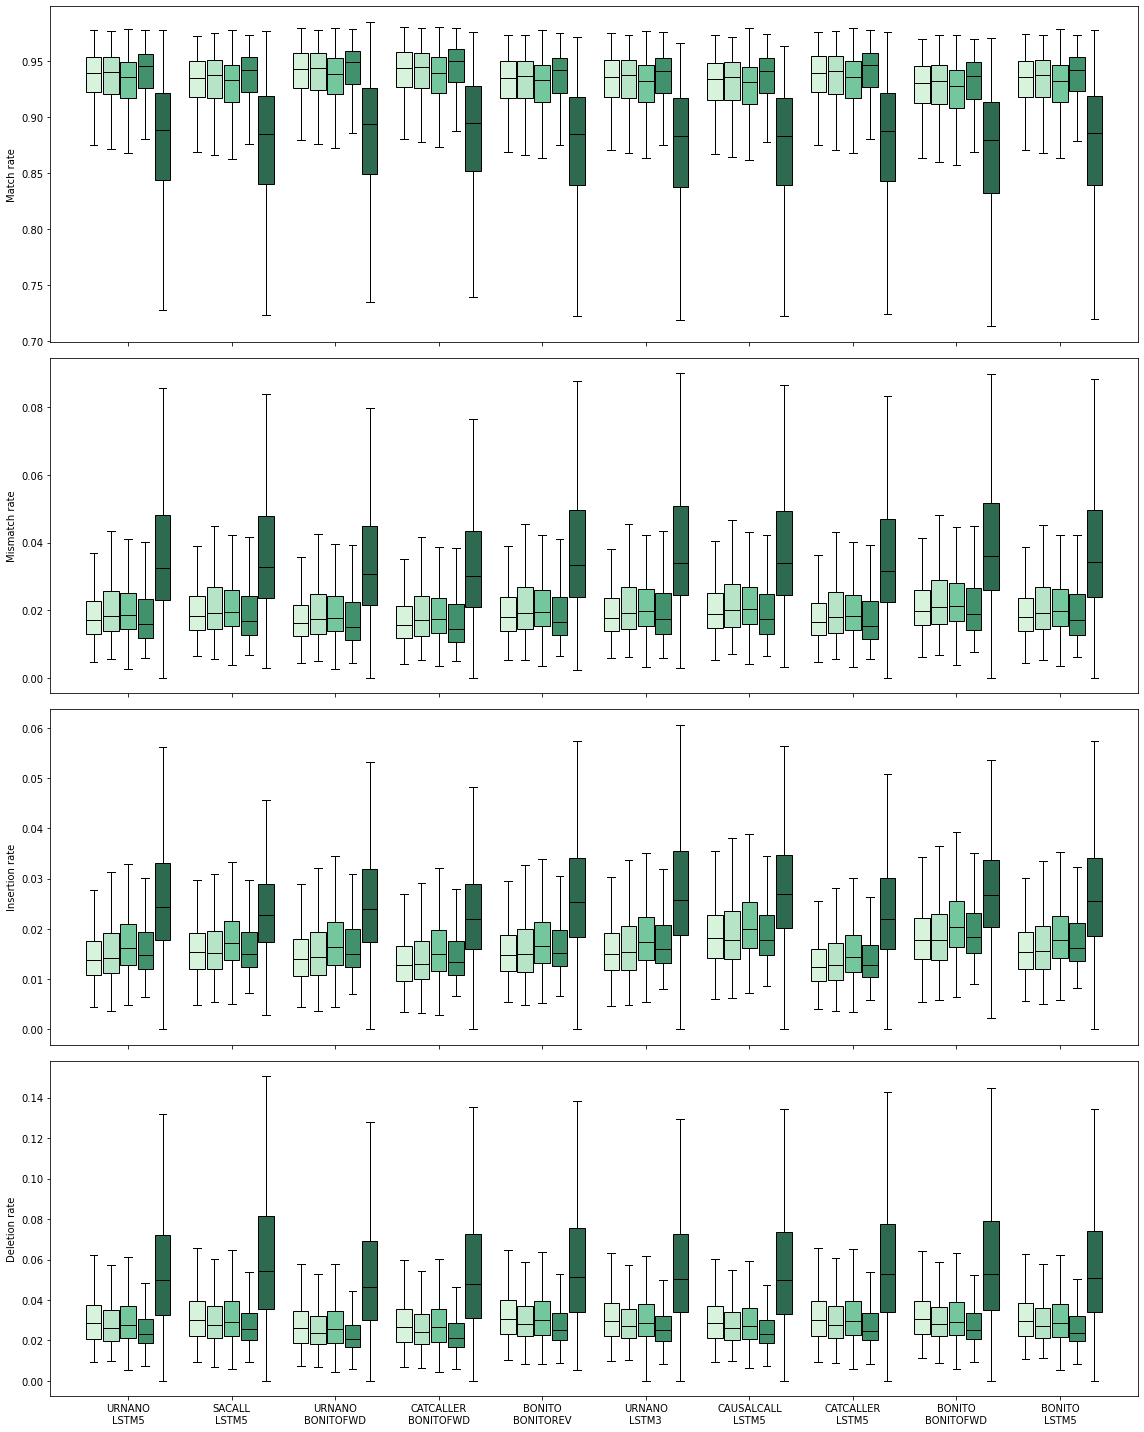

In [15]:
fig, axes = plt.subplots(4, 1, figsize = (16, 20), sharex = True)

names = list()
for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    names.append(modelname.split('_')[0].upper() + '\n' + modelname.split('_')[1].upper())
    for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
        df = pd.read_csv(
            os.path.join(
                model_dir_global,
                modelname,
                d,
                'reports',
                'report_'+modelname+'_eventrates.csv'
            ),
            header = 0,
            comment = '#'
        )
        for k, metric in enumerate(['match_rate', 'mismatch_rate', 'insertion_rate', 'deletion_rate']):
            stats = dict()
            for s, v in zip(df['stats'], df[metric]):
                stats[s] = v
            stats['fliers'] = []
            
            bp = axes.flatten()[k].bxp([stats], positions = [i+j/5+i*0.2], widths = [0.18], patch_artist = True)
            axes.flatten()[k].set_xticks(np.arange(0.4, 12, 1.2))
            axes.flatten()[k].set_ylabel(metric_rename[metric])

            for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                plt.setp(bp[element], color='black',  linewidth=1)
            plt.setp(bp['boxes'], facecolor = diff_colors[d])

    if len(names) == 10:
        axes.flatten()[k].set_xticklabels(names)

fig.tight_layout()
    


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.75it/s]


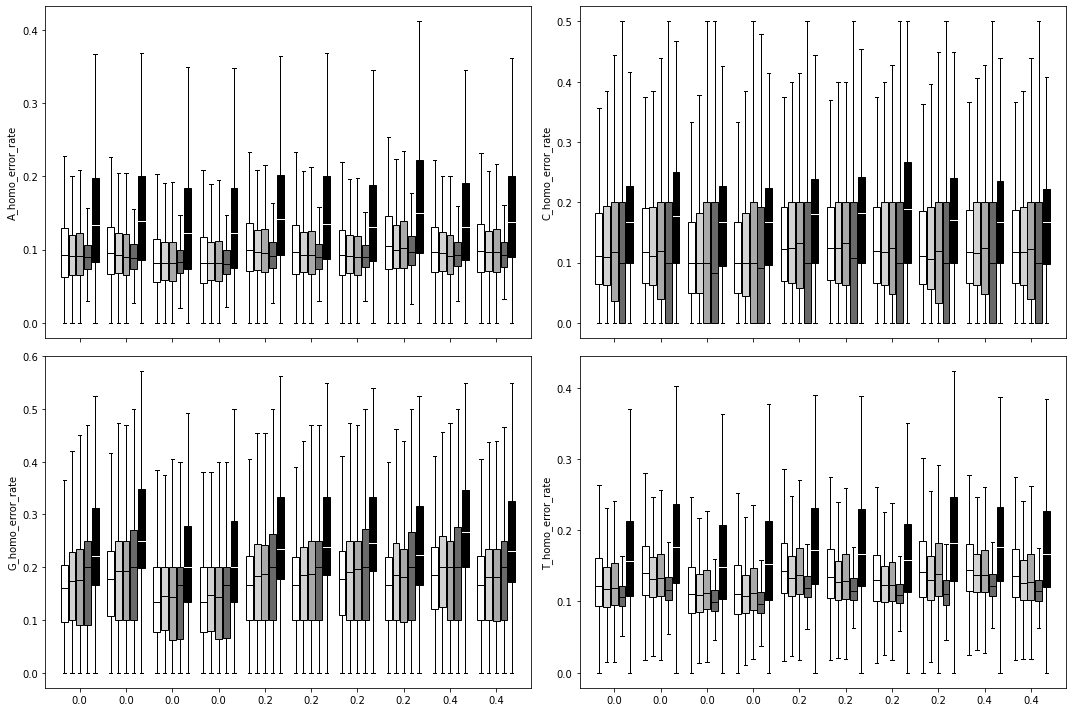

In [139]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10), sharex = True)

for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
        df = pd.read_csv(
            os.path.join(
                model_dir_global,
                modelname,
                d,
                'reports',
                'report_'+modelname+'_homopolymerrates.csv'
            ),
            header = 0,
            comment = '#'
        )
        for k, metric in enumerate(['A_homo_error_rate', 'C_homo_error_rate', 'G_homo_error_rate', 'T_homo_error_rate']):
            stats = dict()
            for s, v in zip(df['stats'], df[metric]):
                stats[s] = v
            stats['fliers'] = []
            
            bp = axes.flatten()[k].bxp([stats], positions = [i+j/5+i*0.2], widths = [0.18], patch_artist = True)
            axes.flatten()[k].set_xticks(np.arange(0.4, 12, 1.2))
            axes.flatten()[k].set_ylabel(metric)

            for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                if element == 'medians':
                    if d == 'd4.0':
                        c = 'white'
                    else:
                        c = 'black'
                else:
                    c = 'black'
                plt.setp(bp[element], color=c,  linewidth=1)
            plt.setp(bp['boxes'], facecolor = diff_colors[d])

fig.tight_layout()
    


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.77it/s]


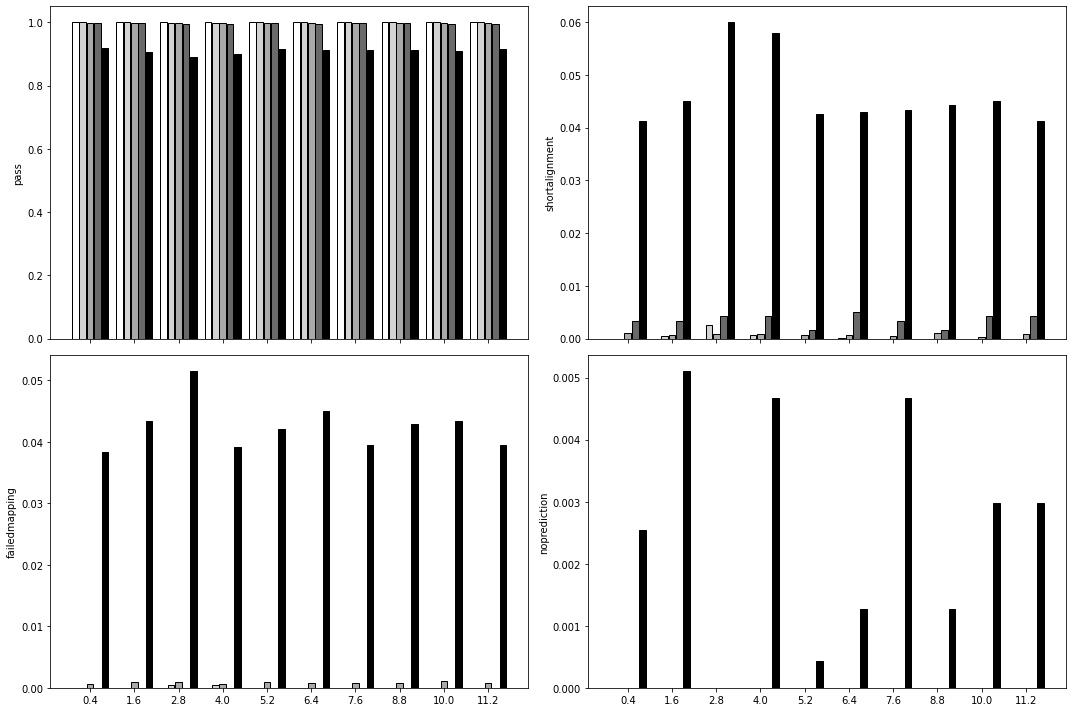

In [136]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10), sharex = True)

for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
        df = pd.read_csv(
            os.path.join(
                model_dir_global,
                modelname,
                d,
                'reports',
                'report_'+modelname+'_readoutcomes.csv'
            ),
            header = 0,
            comment = '#'
        )
        for k, metric in enumerate(['pass', 'shortalignment', 'failedmapping', 'noprediction']):
            
            try:
                axes.flatten()[k].bar(
                    x = [i+j/5+i*0.2], 
                    height = [df[metric].item()/np.sum(np.array(df.iloc[:, 1:]))], 
                    width = 0.18,
                    color = diff_colors[d],
                    edgecolor = 'black'
                )
            except KeyError:
                axes.flatten()[k].bar(x = [i+j/5+i*0.2], height = [0], width = 0.18)
            axes.flatten()[k].set_xticks(np.arange(0.4, 12, 1.2))
            axes.flatten()[k].set_ylabel(metric)

fig.tight_layout()
    


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.00it/s]


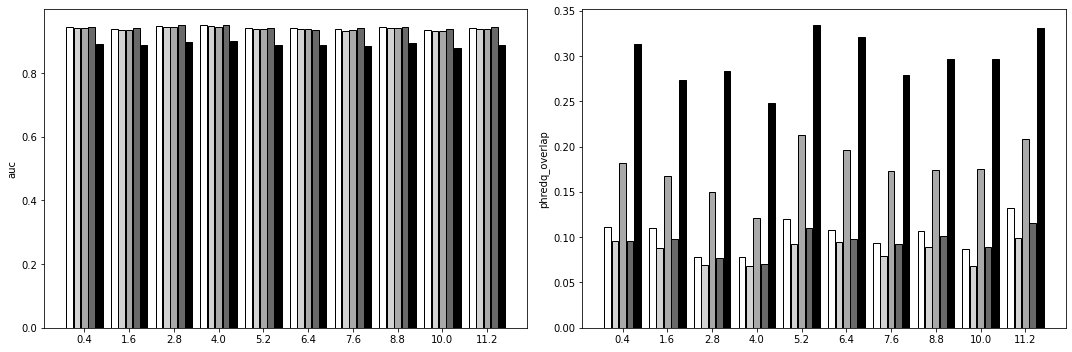

In [135]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5), sharex = True)

for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
        df = pd.read_csv(
            os.path.join(
                model_dir_global,
                modelname,
                d,
                'reports',
                'report_'+modelname+'_singlevalues.csv'
            ),
            header = 0,
            comment = '#'
        )
        for k, metric in enumerate(['auc', 'phredq_overlap']):
            
            axes.flatten()[k].bar(
                x = [i+j/5+i*0.2], 
                height = [df.loc[df['metric'] == metric, 'value'].item()], 
                width = 0.18,
                color = diff_colors[d],
                edgecolor = 'black'
            )
            
            axes.flatten()[k].set_xticks(np.arange(0.4, 12, 1.2))
            axes.flatten()[k].set_ylabel(metric)

fig.tight_layout()
    


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 57.64it/s]


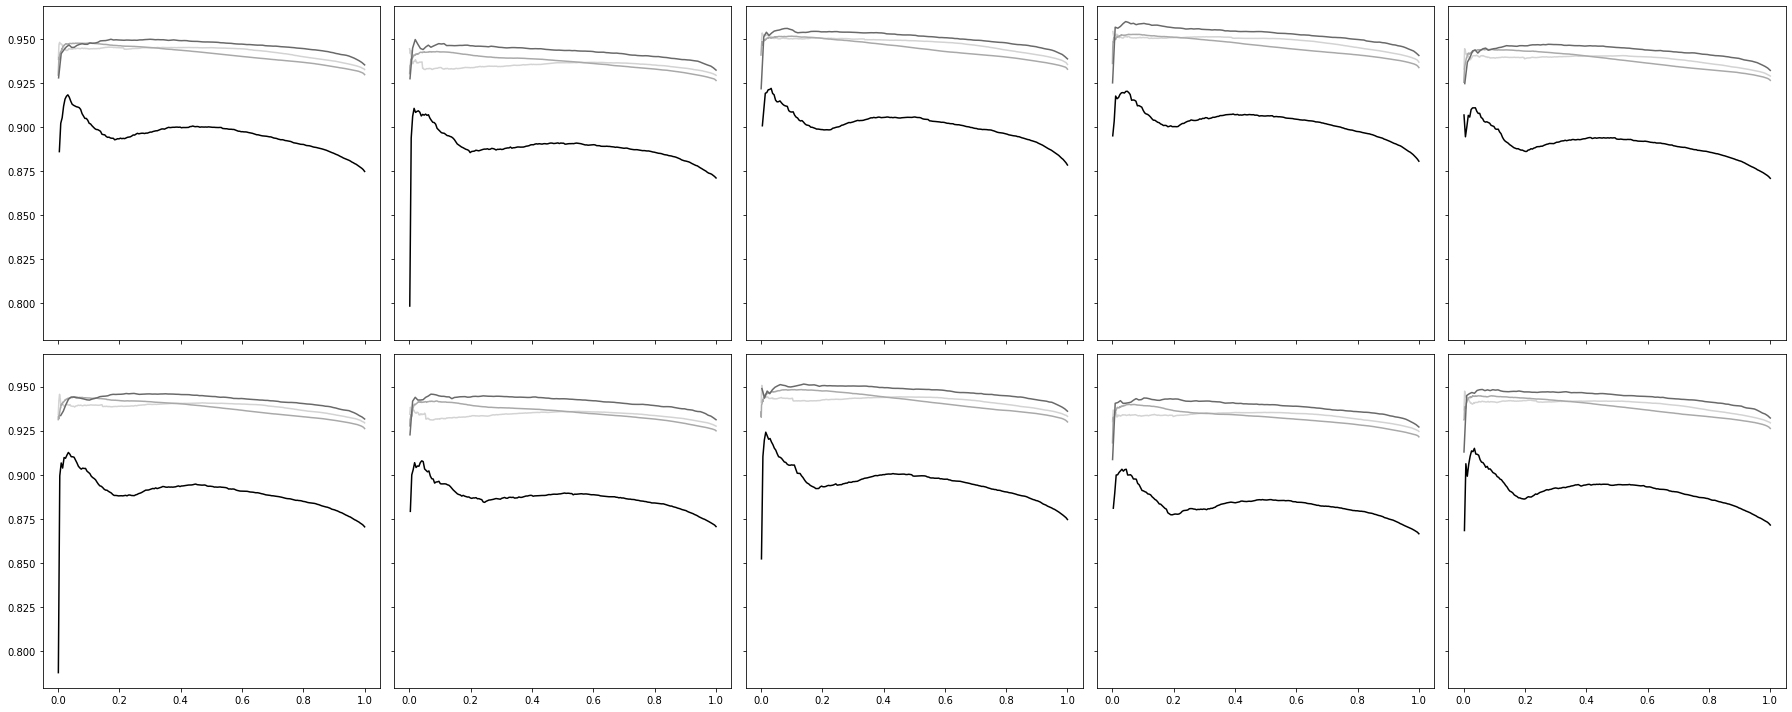

In [145]:
fig, axes = plt.subplots(2, 5, figsize = (25, 10), sharex = True, sharey = True)

for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
        df = pd.read_csv(
            os.path.join(
                model_dir_global,
                modelname,
                d,
                'reports',
                'report_'+modelname+'_auc.csv'
            ),
            header = 0,
            comment = '#'
        )
        
        axes.flatten()[i].plot(
            df['fraction'], 
            df['match_rate'], 
            color = diff_colors[d],
        )

fig.tight_layout()

In [184]:
# model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global'

# for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):

#     diff_split = dict()
#     for d in difficulties:
#         diff_split[d] = list()
#     diff_split['human'] = list()

#     df = pd.read_csv(
#         os.path.join(
#             model_dir_global,
#             modelname,
#             'basecalls_400_1_0.1_evaluation.csv'
#         ),
#         header = 0,
#         comment = '#'
#     )
    
#     for i, row in df.iterrows():
#         spe = read_to_spe_mapper[row['read_id']]
#         diff = spe_difficulty.loc[spe_difficulty['Species'] == spe, 'Difficulty']
#         if len(diff) == 0:
#             diff = spe_difficulty.loc[spe_difficulty['Species'] == spe.replace('_', ' '), 'Difficulty']
#         if len(diff) == 0:
#             continue
#         diff_split[diff.item()].append(row)
#         if spe == 'Homo_sapiens':
#             diff_split['human'].append(row)

    

#     for d, v in diff_split.items():
#         if os.path.exists(os.path.join(model_dir_global, modelname, 'd'+str(d), 'evaluation.csv')):
#             continue
#         try:
#             os.mkdir(os.path.join(model_dir_global, modelname, 'd'+str(d)))
#         except:
#             pass
#         df = pd.concat(v, axis = 1)
#         df = df.transpose()
#         with open(os.path.join(model_dir_global, modelname, 'd'+str(d), 'evaluation.csv'), 'w') as f:
#             f.write('#'+modelname+'\n')
#         df.to_csv(os.path.join(model_dir_global, modelname, 'd'+str(d), 'evaluation.csv'), index=False, header = True, mode = 'a')

#         os.system("python /hpc/compgen/users/mpages/nanopore_benchmark/report.py --evaluation-file "+os.path.join(model_dir_global, modelname, 'd'+str(d), 'evaluation.csv') + ' --output-dir ' + os.path.join(model_dir_global, modelname, 'd'+str(d), 'reports') + ' --overwrite')  

    
        
    
    
        
    

 10%|███████████████████                                                                                                                                                                           | 1/10 [00:40<06:04, 40.51s/it]

Output dir: /hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global/urnano_lstm5_crf_True_2000/dhuman/reports


 20%|██████████████████████████████████████                                                                                                                                                        | 2/10 [01:21<05:24, 40.62s/it]

Output dir: /hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global/sacall_lstm5_crf_True_2000/dhuman/reports


 30%|█████████████████████████████████████████████████████████                                                                                                                                     | 3/10 [02:01<04:44, 40.61s/it]

Output dir: /hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global/urnano_bonitofwd_crf_True_2000/dhuman/reports


 40%|████████████████████████████████████████████████████████████████████████████                                                                                                                  | 4/10 [02:41<04:02, 40.43s/it]

Output dir: /hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global/catcaller_bonitofwd_crf_True_2000/dhuman/reports


 50%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                               | 5/10 [03:22<03:22, 40.50s/it]

Output dir: /hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global/bonito_bonitorev_crf_True_2000/dhuman/reports


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 6/10 [04:02<02:41, 40.26s/it]

Output dir: /hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global/urnano_lstm3_crf_True_2000/dhuman/reports


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 7/10 [04:43<02:01, 40.46s/it]

Output dir: /hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global/causalcall_lstm5_crf_True_2000/dhuman/reports


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 8/10 [05:23<01:20, 40.26s/it]

Output dir: /hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global/catcaller_lstm5_crf_True_2000/dhuman/reports


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 9/10 [06:04<00:40, 40.50s/it]

Output dir: /hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global/bonito_bonitofwd_crf_True_2000/dhuman/reports


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [06:44<00:00, 40.44s/it]

Output dir: /hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global/bonito_lstm5_crf_True_2000/dhuman/reports


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.64it/s]


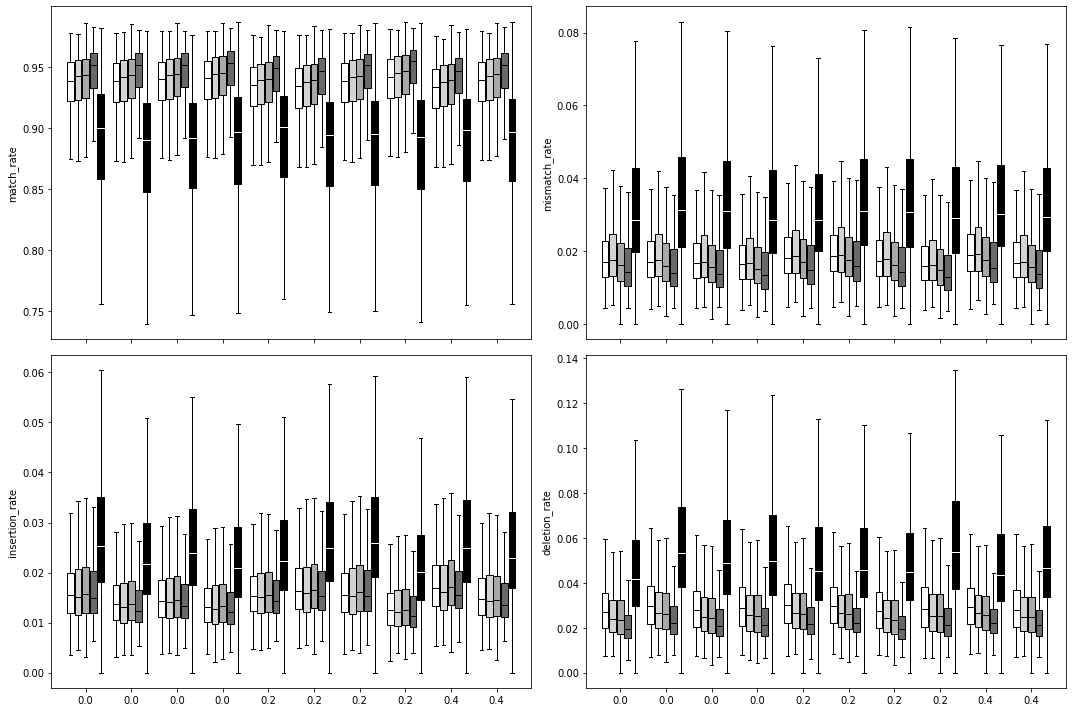

In [156]:
model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global'

fig, axes = plt.subplots(2, 2, figsize = (15, 10), sharex = True)

for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
        df = pd.read_csv(
            os.path.join(
                model_dir_global,
                modelname,
                d,
                'reports',
                'report_'+modelname+'_eventrates.csv'
            ),
            header = 0,
            comment = '#'
        )
        for k, metric in enumerate(['match_rate', 'mismatch_rate', 'insertion_rate', 'deletion_rate']):
            stats = dict()
            for s, v in zip(df['stats'], df[metric]):
                stats[s] = v
            stats['fliers'] = []
            
            bp = axes.flatten()[k].bxp([stats], positions = [i+j/5+i*0.2], widths = [0.18], patch_artist = True)
            axes.flatten()[k].set_xticks(np.arange(0.4, 12, 1.2))
            axes.flatten()[k].set_ylabel(metric)

            for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                if element == 'medians':
                    if d == 'd4.0':
                        c = 'white'
                    else:
                        c = 'black'
                else:
                    c = 'black'
                plt.setp(bp[element], color=c,  linewidth=1)
            plt.setp(bp['boxes'], facecolor = diff_colors[d])

fig.tight_layout()
    


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.23it/s]


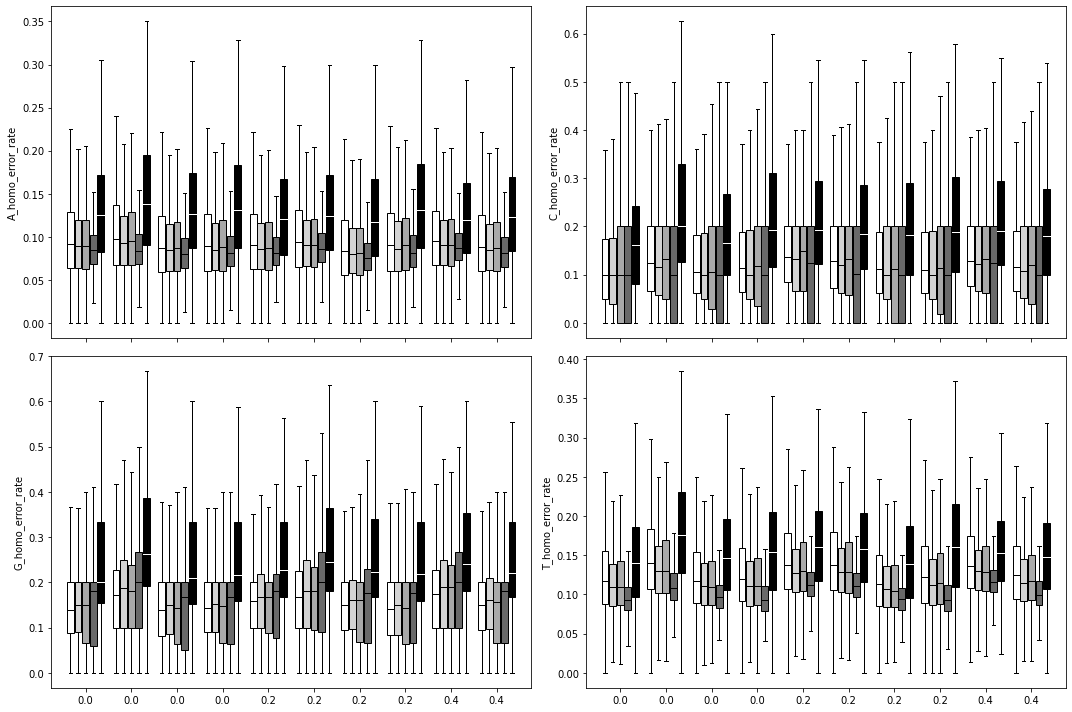

In [159]:
model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global'

fig, axes = plt.subplots(2, 2, figsize = (15, 10), sharex = True)

for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
        df = pd.read_csv(
            os.path.join(
                model_dir_global,
                modelname,
                d,
                'reports',
                'report_'+modelname+'_homopolymerrates.csv'
            ),
            header = 0,
            comment = '#'
        )
        for k, metric in enumerate(['A_homo_error_rate', 'C_homo_error_rate', 'G_homo_error_rate', 'T_homo_error_rate']):
            stats = dict()
            for s, v in zip(df['stats'], df[metric]):
                stats[s] = v
            stats['fliers'] = []
            
            bp = axes.flatten()[k].bxp([stats], positions = [i+j/5+i*0.2], widths = [0.18], patch_artist = True)
            axes.flatten()[k].set_xticks(np.arange(0.4, 12, 1.2))
            axes.flatten()[k].set_ylabel(metric)

            for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                if element == 'medians':
                    if d == 'd4.0':
                        c = 'white'
                    else:
                        c = 'black'
                else:
                    c = 'black'
                plt.setp(bp[element], color=c,  linewidth=1)
            plt.setp(bp['boxes'], facecolor = diff_colors[d])

fig.tight_layout()
    


In [16]:
diff_colors = {
    'inter': {
        'd0.0': '#d8f3dc',
        'd1.0': '#b7e4c7',
        'd2.0': '#74c69d',
        'd3.0': '#40916c',
        'd4.0': '#2d6a4f',
        'dhuman': '#2d6a4f',
    },
    'global': {
        'd0.0': '#A6F7F3',
        'd1.0': '#95D1F2',
        'd2.0': '#84AAF2',
        'd3.0': '#7384F1',
        'd4.0': '#625DF0',
        'dhuman': '#625DF0',
    }
}

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.50it/s]


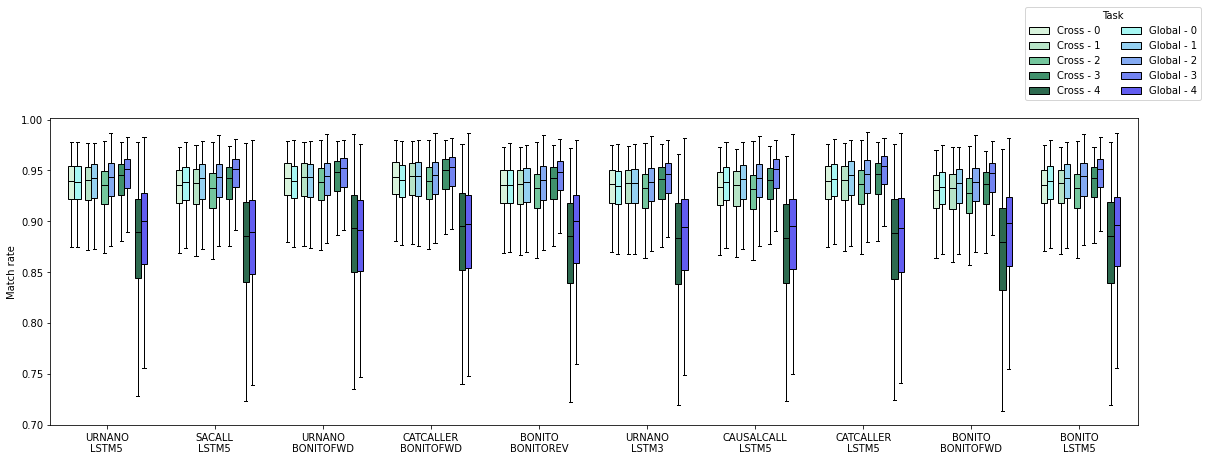

In [37]:
import matplotlib.patches as mpatches


fig, axes = plt.subplots(1, 1, figsize = (16, 5), sharex = True)
model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global'
model_inter_dir = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/inter'

names = list()
for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    names.append(modelname.split('_')[0].upper() + '\n' + modelname.split('_')[1].upper())
    for l, (task, taskdir) in enumerate(zip(['inter', 'global'], [model_inter_dir, model_dir_global])):
        for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
            df = pd.read_csv(
                os.path.join(
                    taskdir,
                    modelname,
                    d,
                    'reports',
                    'report_'+modelname+'_eventrates.csv'
                ),
                header = 0,
                comment = '#'
            )
            for k, metric in enumerate(['match_rate']):
                stats = dict()
                for s, v in zip(df['stats'], df[metric]):
                    stats[s] = v
                stats['fliers'] = []
                
                bp = axes.bxp([stats], positions = [i+j*0.4 + l*0.15 + i*1.6], widths = [0.15], patch_artist = True)
                axes.set_xticks(np.arange(0.85, 26, 2.6))
                axes.set_ylabel(metric_rename[metric])

                for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                    plt.setp(bp[element], color='black',  linewidth=1)
                plt.setp(bp['boxes'], facecolor = diff_colors[task][d])

                if len(names) == 10:
                    axes.set_xticklabels(names)


legend_dict = {
    'Cross - 0': '#d8f3dc',
    'Cross - 1': '#b7e4c7',
    'Cross - 2': '#74c69d',
    'Cross - 3': '#40916c',
    'Cross - 4': '#2d6a4f',
    'Global - 0': '#A6F7F3',
    'Global - 1': '#95D1F2',
    'Global - 2': '#84AAF2',
    'Global - 3': '#7384F1',
    'Global - 4': '#625DF0',
}

patchList = []
for key in legend_dict:
    data_key = mpatches.Patch(facecolor=legend_dict[key], label=key, edgecolor = 'black')
    patchList.append(data_key)

fig.legend(handles=patchList, ncol = 2, title = 'Task', loc = "lower right", bbox_to_anchor=(1.05, 1))

fig.tight_layout()
fig.savefig(os.path.join(plots_dir, 'cross_vs_global_matchrate.pdf'), dpi = 600)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.79it/s]


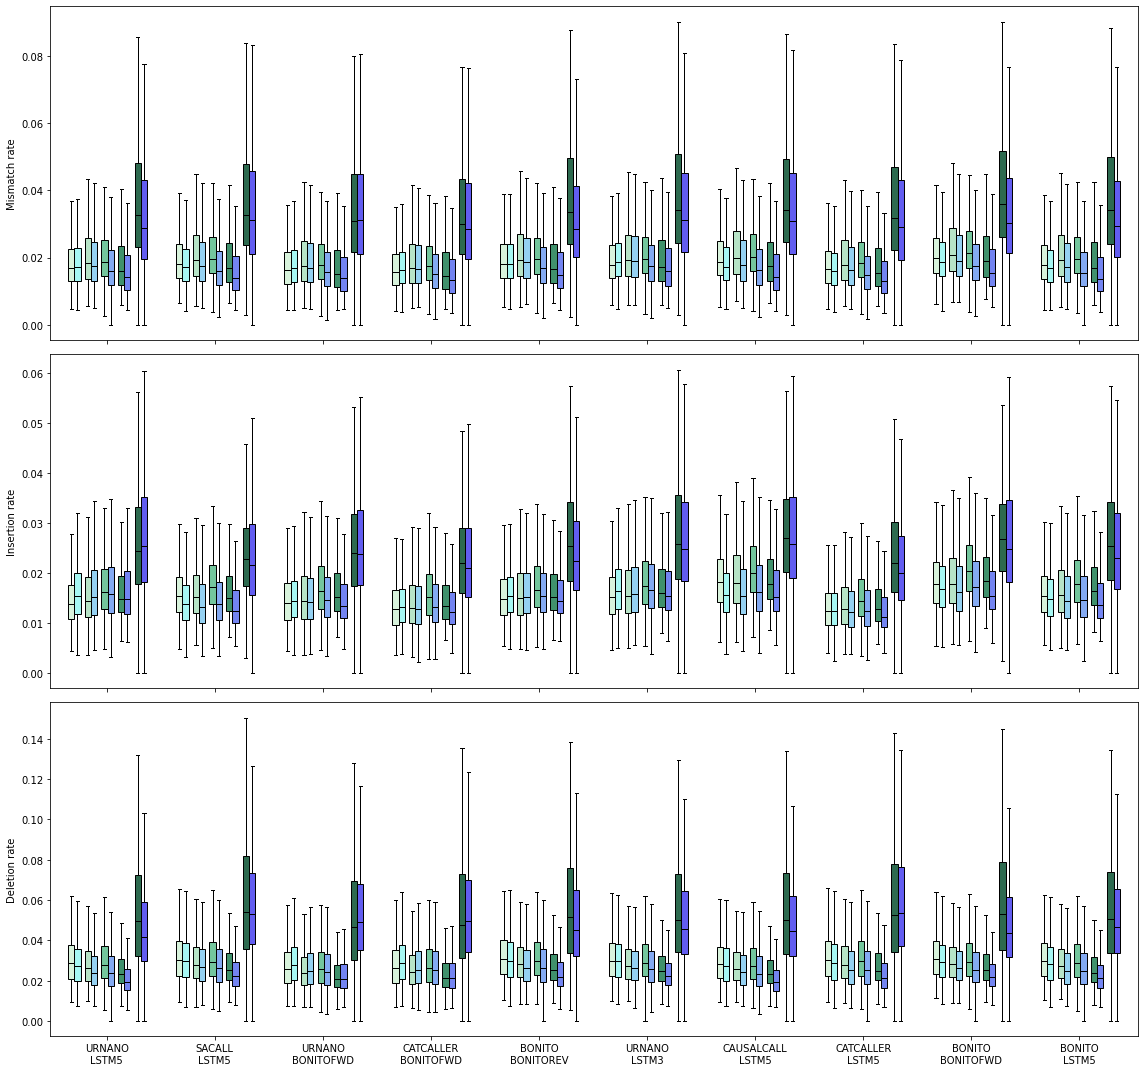

In [39]:
import matplotlib.patches as mpatches


fig, axes = plt.subplots(3, 1, figsize = (16, 15), sharex = True)
model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global'
model_inter_dir = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/inter'

names = list()
for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    names.append(modelname.split('_')[0].upper() + '\n' + modelname.split('_')[1].upper())
    for l, (task, taskdir) in enumerate(zip(['inter', 'global'], [model_inter_dir, model_dir_global])):
        for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
            df = pd.read_csv(
                os.path.join(
                    taskdir,
                    modelname,
                    d,
                    'reports',
                    'report_'+modelname+'_eventrates.csv'
                ),
                header = 0,
                comment = '#'
            )
            for k, metric in enumerate(['mismatch_rate', 'insertion_rate', 'deletion_rate']):
                stats = dict()
                for s, v in zip(df['stats'], df[metric]):
                    stats[s] = v
                stats['fliers'] = []
                
                bp = axes.flatten()[k].bxp([stats], positions = [i+j*0.4 + l*0.15 + i*1.6], widths = [0.15], patch_artist = True)
                axes.flatten()[k].set_xticks(np.arange(0.85, 26, 2.6))
                axes.flatten()[k].set_ylabel(metric_rename[metric])

                for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                    plt.setp(bp[element], color='black',  linewidth=1)
                plt.setp(bp['boxes'], facecolor = diff_colors[task][d])

                if len(names) == 10:
                    axes.flatten()[k].set_xticklabels(names)


legend_dict = {
    'Cross - 0': '#d8f3dc',
    'Cross - 1': '#b7e4c7',
    'Cross - 2': '#74c69d',
    'Cross - 3': '#40916c',
    'Cross - 4': '#2d6a4f',
    'Global - 0': '#A6F7F3',
    'Global - 1': '#95D1F2',
    'Global - 2': '#84AAF2',
    'Global - 3': '#7384F1',
    'Global - 4': '#625DF0',
}

# patchList = []
# for key in legend_dict:
#     data_key = mpatches.Patch(facecolor=legend_dict[key], label=key, edgecolor = 'black')
#     patchList.append(data_key)

# fig.legend(handles=patchList, ncol = 2, title = 'Task', loc = "lower right", bbox_to_anchor=(1.05, 1))

fig.tight_layout()
fig.savefig(os.path.join(plots_dir, 'cross_vs_global_eventrates_nolegend.pdf'), dpi = 600)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.84it/s]


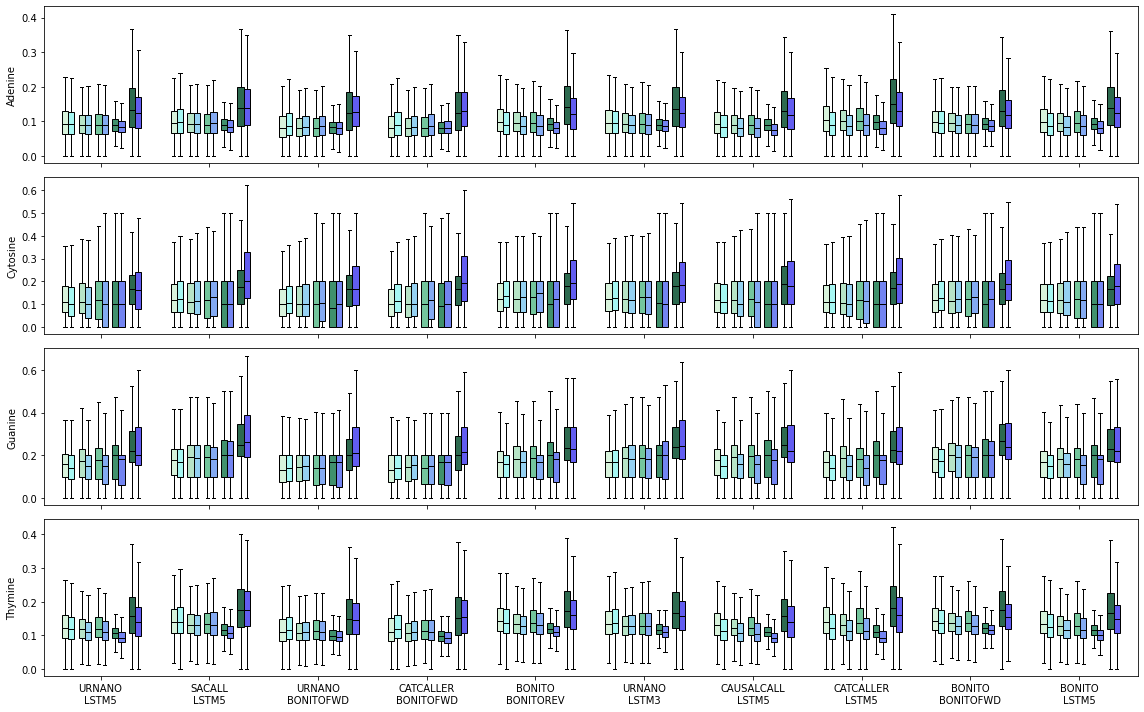

In [60]:
diff_colors = {
    'inter': {
        'd0.0': '#d8f3dc',
        'd1.0': '#b7e4c7',
        'd2.0': '#74c69d',
        'd3.0': '#40916c',
        'd4.0': '#2d6a4f',
        'dhuman': '#2d6a4f',
    },
    'global': {
        'd0.0': '#A6F7F3',
        'd1.0': '#95D1F2',
        'd2.0': '#84AAF2',
        'd3.0': '#7384F1',
        'd4.0': '#625DF0',
        'dhuman': '#625DF0',
    }
}

import matplotlib.patches as mpatches


fig, axes = plt.subplots(4, 1, figsize = (16, 10), sharex = True)
model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global'
model_inter_dir = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/inter'

names = list()
for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    names.append(modelname.split('_')[0].upper() + '\n' + modelname.split('_')[1].upper())
    for l, (task, taskdir) in enumerate(zip(['inter', 'global'], [model_inter_dir, model_dir_global])):
        for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
            df = pd.read_csv(
                os.path.join(
                    taskdir,
                    modelname,
                    d,
                    'reports',
                    'report_'+modelname+'_homopolymerrates.csv'
                ),
                header = 0,
                comment = '#'
            )
            for k, metric in enumerate(['A_homo_error_rate', 'C_homo_error_rate', 'G_homo_error_rate', 'T_homo_error_rate']):
                stats = dict()
                for s, v in zip(df['stats'], df[metric]):
                    stats[s] = v
                stats['fliers'] = []
                
                bp = axes.flatten()[k].bxp([stats], positions = [i+j*0.4 + l*0.15 + i*1.6], widths = [0.15], patch_artist = True)
                axes.flatten()[k].set_xticks(np.arange(0.85, 26, 2.6))
                axes.flatten()[k].set_ylabel(metric_rename[metric])

                for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                    plt.setp(bp[element], color='black',  linewidth=1)
                plt.setp(bp['boxes'], facecolor = diff_colors[task][d])

                if len(names) == 10:
                    axes.flatten()[k].set_xticklabels(names)


legend_dict = {
    'Cross - 0': '#d8f3dc',
    'Cross - 1': '#b7e4c7',
    'Cross - 2': '#74c69d',
    'Cross - 3': '#40916c',
    'Cross - 4': '#2d6a4f',
    'Global - 0': '#A6F7F3',
    'Global - 1': '#95D1F2',
    'Global - 2': '#84AAF2',
    'Global - 3': '#7384F1',
    'Global - 4': '#625DF0',
}

# patchList = []
# for key in legend_dict:
#     data_key = mpatches.Patch(facecolor=legend_dict[key], label=key, edgecolor = 'black')
#     patchList.append(data_key)

# fig.legend(handles=patchList, ncol = 2, title = 'Task', loc = "lower right", bbox_to_anchor=(1.05, 1))

fig.tight_layout()
fig.savefig(os.path.join(plots_dir, 'cross_vs_global_homorates_nolegend.pdf'), dpi = 600)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.23it/s]


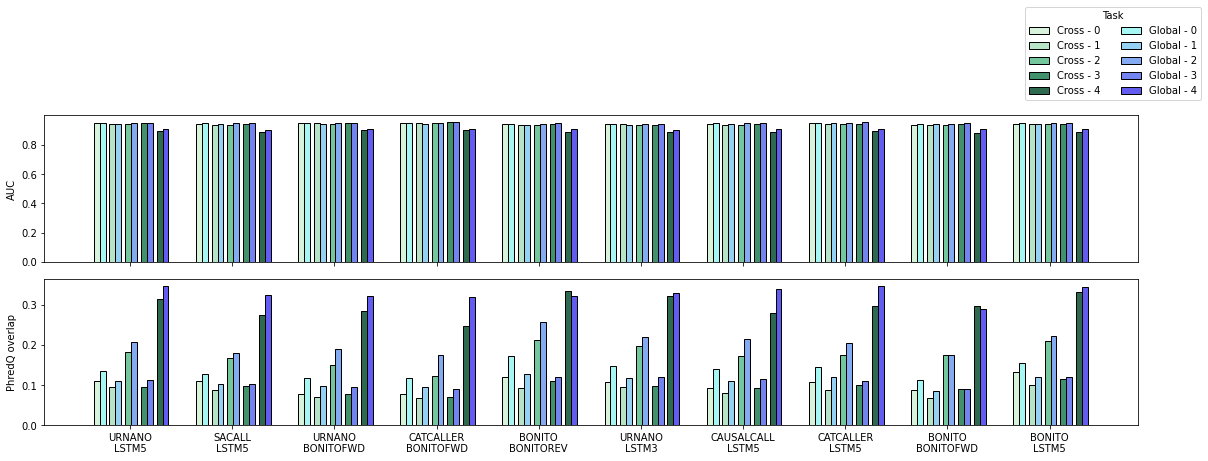

In [58]:
diff_colors = {
    'inter': {
        'd0.0': '#d8f3dc',
        'd1.0': '#b7e4c7',
        'd2.0': '#74c69d',
        'd3.0': '#40916c',
        'd4.0': '#2d6a4f',
        'dhuman': '#2d6a4f',
    },
    'global': {
        'd0.0': '#A6F7F3',
        'd1.0': '#95D1F2',
        'd2.0': '#84AAF2',
        'd3.0': '#7384F1',
        'd4.0': '#625DF0',
        'dhuman': '#625DF0',
    }
}

import matplotlib.patches as mpatches


fig, axes = plt.subplots(2, 1, figsize = (16, 5), sharex = True)
model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global'
model_inter_dir = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/inter'

names = list()
for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    names.append(modelname.split('_')[0].upper() + '\n' + modelname.split('_')[1].upper())
    for l, (task, taskdir) in enumerate(zip(['inter', 'global'], [model_inter_dir, model_dir_global])):
        for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
            df = pd.read_csv(
                os.path.join(
                    taskdir,
                    modelname,
                    d,
                    'reports',
                    'report_'+modelname+'_singlevalues.csv'
                ),
                header = 0,
                comment = '#'
            )
            for k, metric in enumerate(['auc', 'phredq_overlap']):
                
                axes.flatten()[k].bar(
                    x = [i+j*0.4 + l*0.15 + i*1.6], 
                    height = [df.loc[df['metric'] == metric, 'value'].item()], 
                    width = 0.15,
                    color = diff_colors[task][d],
                    edgecolor = 'black'
                )
                axes.flatten()[k].set_xticks(np.arange(0.85, 26, 2.6))
                axes.flatten()[k].set_ylabel(metric_rename[metric])

                if len(names) == 10:
                    axes.flatten()[k].set_xticklabels(names)


legend_dict = {
    'Cross - 0': '#d8f3dc',
    'Cross - 1': '#b7e4c7',
    'Cross - 2': '#74c69d',
    'Cross - 3': '#40916c',
    'Cross - 4': '#2d6a4f',
    'Global - 0': '#A6F7F3',
    'Global - 1': '#95D1F2',
    'Global - 2': '#84AAF2',
    'Global - 3': '#7384F1',
    'Global - 4': '#625DF0',
}

patchList = []
for key in legend_dict:
    data_key = mpatches.Patch(facecolor=legend_dict[key], label=key, edgecolor = 'black')
    patchList.append(data_key)

fig.legend(handles=patchList, ncol = 2, title = 'Task', loc = "lower right", bbox_to_anchor=(1.05, 1))

fig.tight_layout()
fig.savefig(os.path.join(plots_dir, 'phredq.pdf'), dpi = 600)


In [68]:
np.sum(np.array(df.iloc[:, 1:]))

3570

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.39it/s]


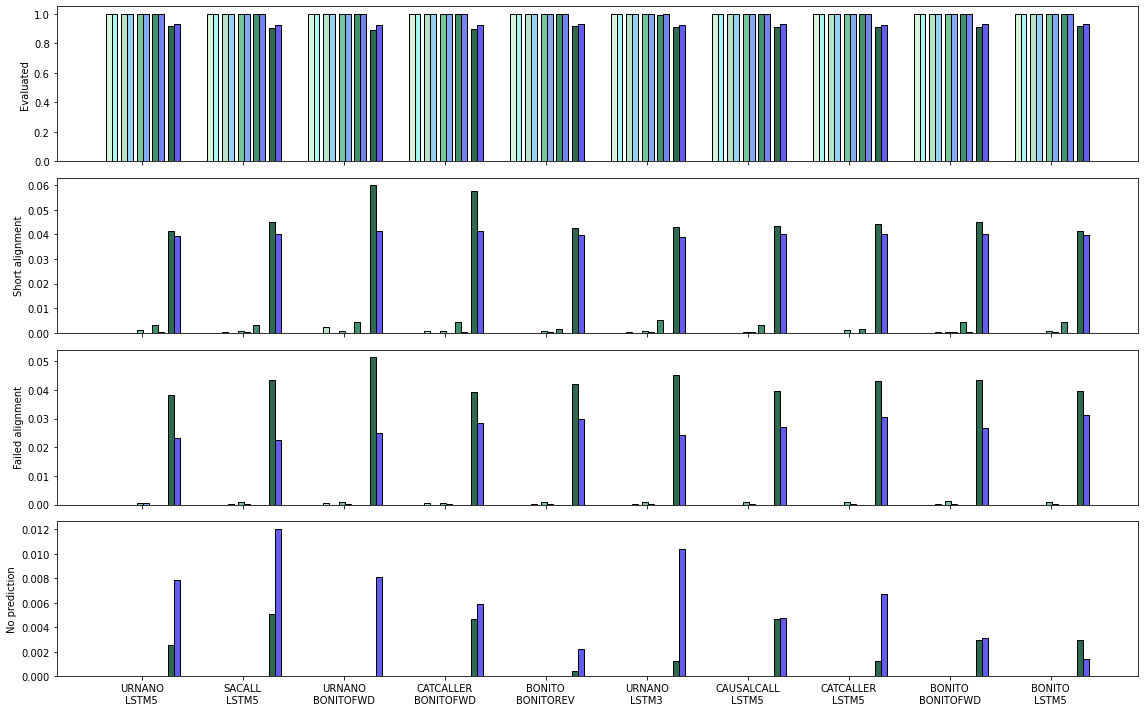

In [71]:
diff_colors = {
    'inter': {
        'd0.0': '#d8f3dc',
        'd1.0': '#b7e4c7',
        'd2.0': '#74c69d',
        'd3.0': '#40916c',
        'd4.0': '#2d6a4f',
        'dhuman': '#2d6a4f',
    },
    'global': {
        'd0.0': '#A6F7F3',
        'd1.0': '#95D1F2',
        'd2.0': '#84AAF2',
        'd3.0': '#7384F1',
        'd4.0': '#625DF0',
        'dhuman': '#625DF0',
    }
}

import matplotlib.patches as mpatches


fig, axes = plt.subplots(4, 1, figsize = (16, 10), sharex = True)
model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global'
model_inter_dir = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/inter'

names = list()
for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    names.append(modelname.split('_')[0].upper() + '\n' + modelname.split('_')[1].upper())
    for l, (task, taskdir) in enumerate(zip(['inter', 'global'], [model_inter_dir, model_dir_global])):
        for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
            df = pd.read_csv(
                os.path.join(
                    taskdir,
                    modelname,
                    d,
                    'reports',
                    'report_'+modelname+'_readoutcomes.csv'
                ),
                header = 0,
                comment = '#'
            )
            total_reads = np.sum(np.array(df.iloc[:, 1:]))
            for k, metric in enumerate(['pass', 'shortalignment', 'failedmapping', 'noprediction']):
                try:
                    v = df[metric].item()
                except KeyError:
                    v = 0
                axes.flatten()[k].bar(
                    x = [i+j*0.4 + l*0.15 + i*1.6], 
                    height = v/total_reads, 
                    width = 0.15,
                    color = diff_colors[task][d],
                    edgecolor = 'black'
                )
                axes.flatten()[k].set_xticks(np.arange(0.85, 26, 2.6))
                axes.flatten()[k].set_ylabel(metric_rename[metric])

                if len(names) == 10:
                    axes.flatten()[k].set_xticklabels(names)


legend_dict = {
    'Cross - 0': '#d8f3dc',
    'Cross - 1': '#b7e4c7',
    'Cross - 2': '#74c69d',
    'Cross - 3': '#40916c',
    'Cross - 4': '#2d6a4f',
    'Global - 0': '#A6F7F3',
    'Global - 1': '#95D1F2',
    'Global - 2': '#84AAF2',
    'Global - 3': '#7384F1',
    'Global - 4': '#625DF0',
}

# patchList = []
# for key in legend_dict:
#     data_key = mpatches.Patch(facecolor=legend_dict[key], label=key, edgecolor = 'black')
#     patchList.append(data_key)

# fig.legend(handles=patchList, ncol = 2, title = 'Task', loc = "lower right", bbox_to_anchor=(1.05, 1))

fig.tight_layout()
fig.savefig(os.path.join(plots_dir, 'readoutcomes_nolegend.pdf'), dpi = 600)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:15<00:00,  1.53s/it]


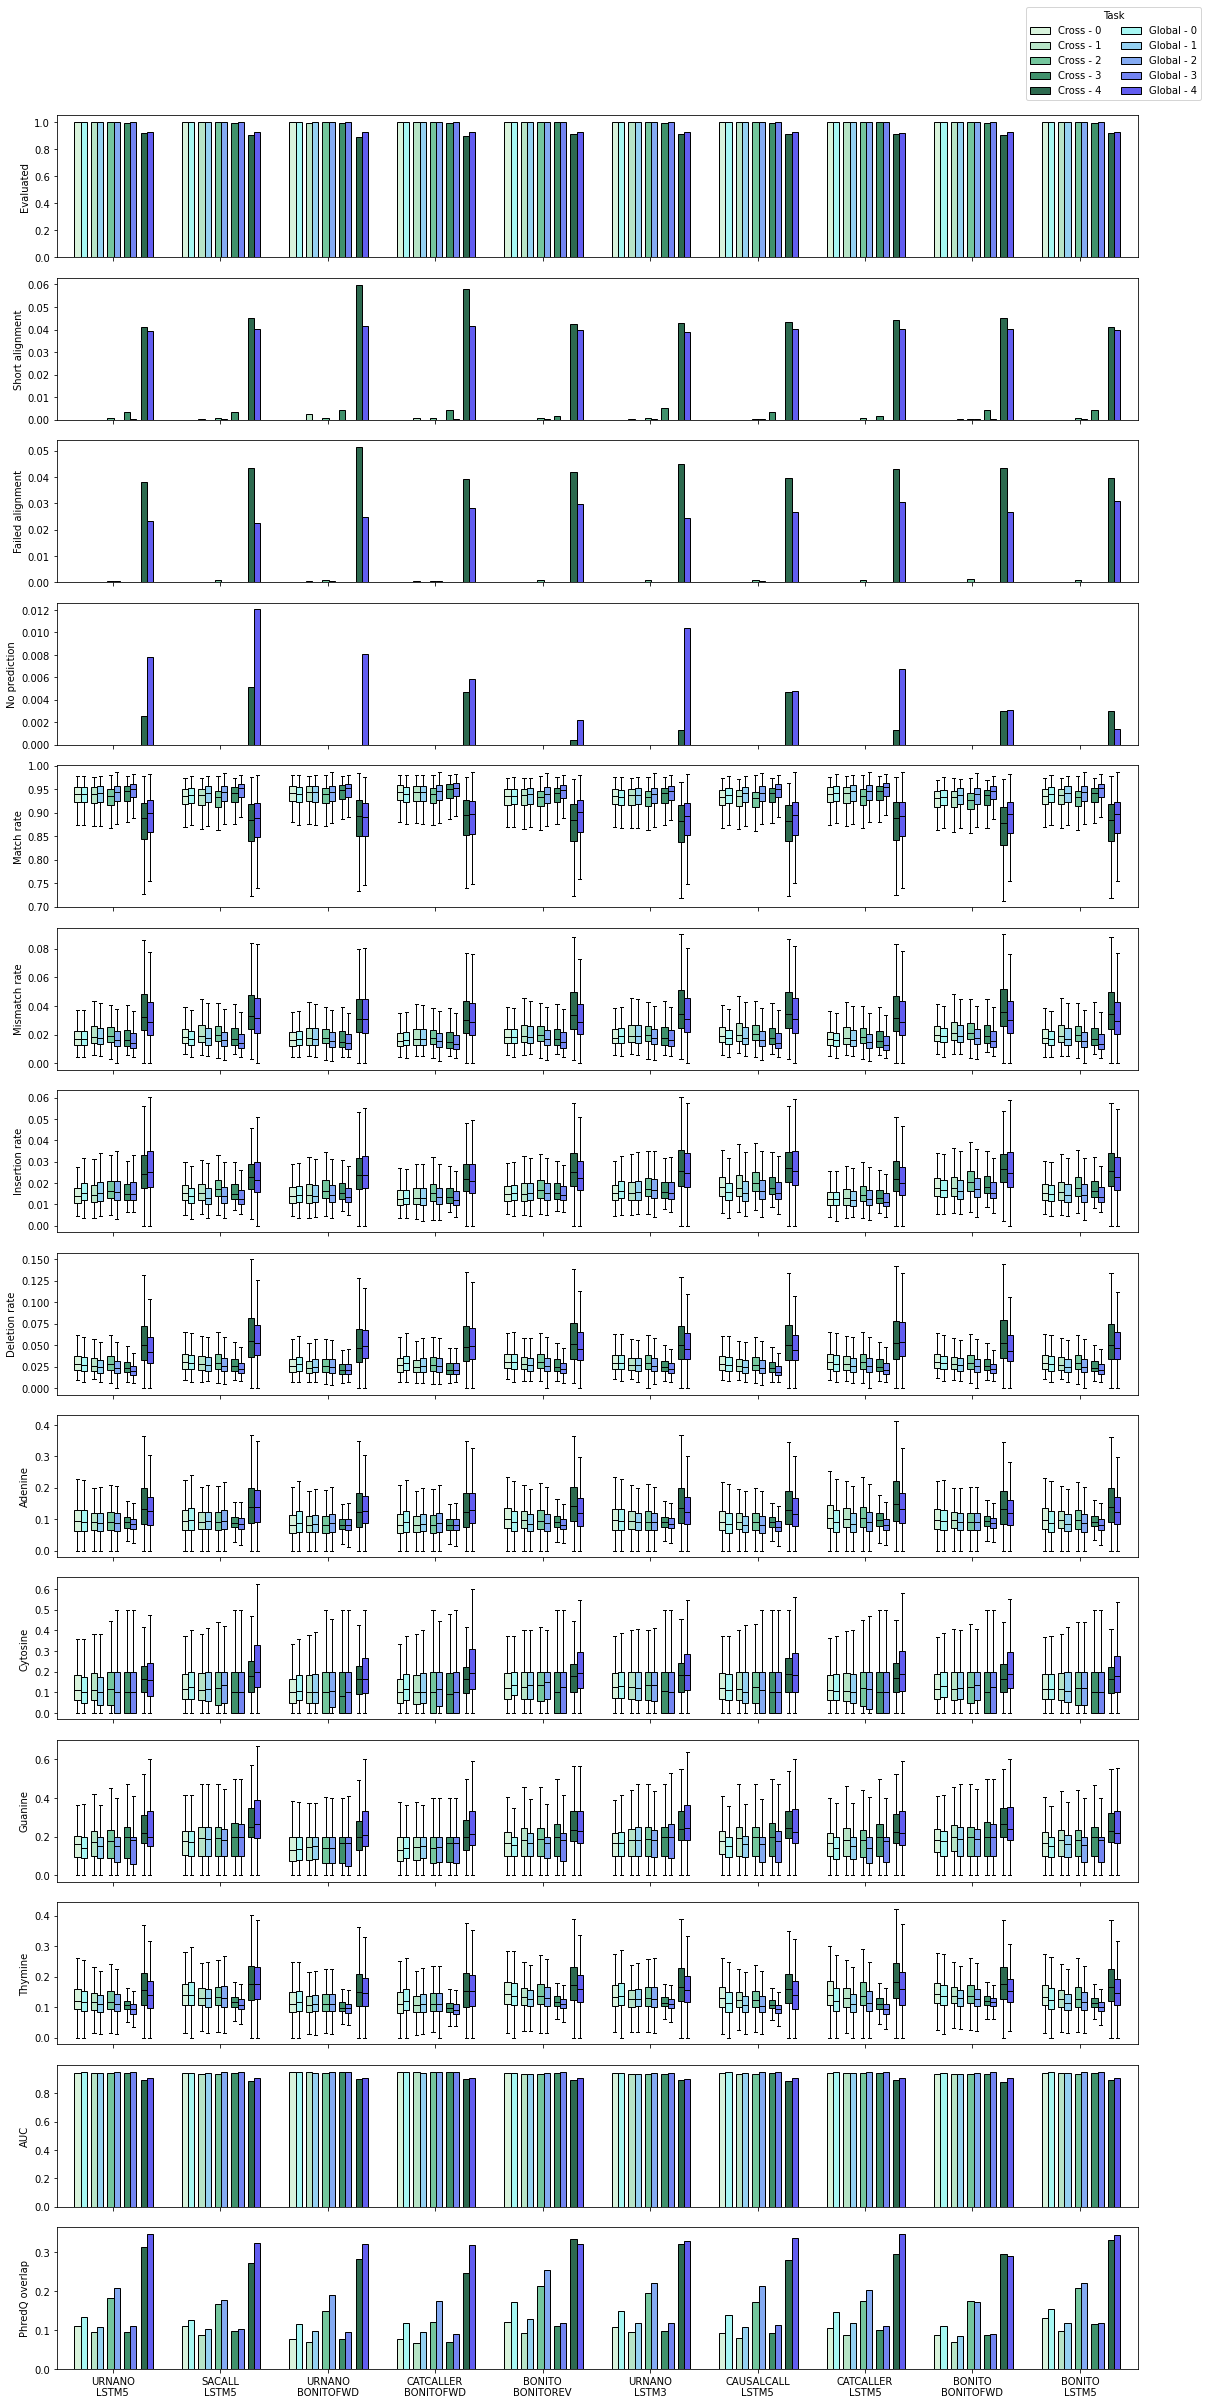

In [89]:
diff_colors = {
    'inter': {
        'd0.0': '#d8f3dc',
        'd1.0': '#b7e4c7',
        'd2.0': '#74c69d',
        'd3.0': '#40916c',
        'd4.0': '#2d6a4f',
        'dhuman': '#2d6a4f',
    },
    'global': {
        'd0.0': '#A6F7F3',
        'd1.0': '#95D1F2',
        'd2.0': '#84AAF2',
        'd3.0': '#7384F1',
        'd4.0': '#625DF0',
        'dhuman': '#625DF0',
    }
}

import matplotlib.patches as mpatches


fig, axes = plt.subplots(14, 1, figsize = (16, 32), sharex = True)
model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global'
model_inter_dir = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/inter'

files_and_metrics = {
    '_readoutcomes': ['pass', 'shortalignment', 'failedmapping', 'noprediction'],
    '_eventrates': ['match_rate', 'mismatch_rate', 'insertion_rate', 'deletion_rate'],
    '_homopolymerrates': ['A_homo_error_rate', 'C_homo_error_rate', 'G_homo_error_rate', 'T_homo_error_rate'],
    '_singlevalues': ['auc', 'phredq_overlap'],
}

files_and_plots = {
    '_readoutcomes': 'barperc',
    '_eventrates': 'boxplot',
    '_homopolymerrates': 'boxplot',
    '_singlevalues': 'bar',
}

metric_to_plotnum = dict()
c = 0
for v in files_and_metrics.values():
    for b in v:
        metric_to_plotnum[b] = c
        c += 1

names = list()
for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    names.append(modelname.split('_')[0].upper() + '\n' + modelname.split('_')[1].upper())
    for l, (task, taskdir) in enumerate(zip(['inter', 'global'], [model_inter_dir, model_dir_global])):
        for j, d in enumerate(['d0.0', 'd1.0', 'd2.0', 'd3.0', 'd4.0']):
            for file in files_and_metrics.keys():
                df = pd.read_csv(
                    os.path.join(
                        taskdir,
                        modelname,
                        d,
                        'reports',
                        'report_'+modelname+file+'.csv'
                    ),
                    header = 0,
                    comment = '#'
                )
                try:
                    total_reads = np.sum(np.array(df.iloc[:, 1:]))
                except:
                    pass
                for metric in files_and_metrics[file]:
                    k += 1
                    if files_and_plots[file] == 'barperc':
                        try:
                            v = df[metric].item()
                        except KeyError:
                            v = 0
                        axes.flatten()[metric_to_plotnum[metric]].bar(
                            x = [i+j*0.4 + l*0.15 + i*1.6], 
                            height = v/total_reads, 
                            width = 0.15,
                            color = diff_colors[task][d],
                            edgecolor = 'black'
                        )
                        axes.flatten()[metric_to_plotnum[metric]].set_xticks(np.arange(0.85, 26, 2.6))
                        axes.flatten()[metric_to_plotnum[metric]].set_ylabel(metric_rename[metric])

                    elif files_and_plots[file] == 'bar':
                        axes.flatten()[metric_to_plotnum[metric]].bar(
                            x = [i+j*0.4 + l*0.15 + i*1.6], 
                            height = [df.loc[df['metric'] == metric, 'value'].item()], 
                            width = 0.15,
                            color = diff_colors[task][d],
                            edgecolor = 'black'
                        )
                        axes.flatten()[metric_to_plotnum[metric]].set_xticks(np.arange(0.85, 26, 2.6))
                        axes.flatten()[metric_to_plotnum[metric]].set_ylabel(metric_rename[metric])
                                
                    elif files_and_plots[file] == 'boxplot':
                        stats = dict()
                        for s, v in zip(df['stats'], df[metric]):
                            stats[s] = v
                        stats['fliers'] = []
                        
                        bp = axes.flatten()[metric_to_plotnum[metric]].bxp([stats], positions = [i+j*0.4 + l*0.15 + i*1.6], widths = [0.15], patch_artist = True)
                        axes.flatten()[metric_to_plotnum[metric]].set_xticks(np.arange(0.85, 26, 2.6))
                        axes.flatten()[metric_to_plotnum[metric]].set_ylabel(metric_rename[metric])

                        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                            plt.setp(bp[element], color='black',  linewidth=1)
                        plt.setp(bp['boxes'], facecolor = diff_colors[task][d])

axes.flatten()[metric_to_plotnum[metric]].set_xticklabels(names)

legend_dict = {
    'Cross - 0': '#d8f3dc',
    'Cross - 1': '#b7e4c7',
    'Cross - 2': '#74c69d',
    'Cross - 3': '#40916c',
    'Cross - 4': '#2d6a4f',
    'Global - 0': '#A6F7F3',
    'Global - 1': '#95D1F2',
    'Global - 2': '#84AAF2',
    'Global - 3': '#7384F1',
    'Global - 4': '#625DF0',
}

patchList = []
for key in legend_dict:
    data_key = mpatches.Patch(facecolor=legend_dict[key], label=key, edgecolor = 'black')
    patchList.append(data_key)

fig.legend(handles=patchList, ncol = 2, title = 'Task', loc = "lower right", bbox_to_anchor=(1.05, 1))

fig.tight_layout()
fig.savefig(os.path.join(plots_dir, 'cross_vs_global_all.pdf'), dpi = 600)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.34it/s]


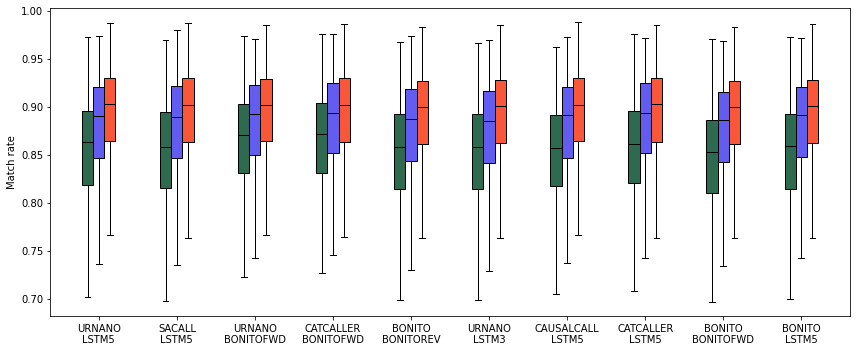

In [101]:
fig, axes = plt.subplots(1, 1, figsize = (12, 5), sharex = True)
model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global'
model_inter_dir = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/inter'

diff_colors = {
    'inter': {
        'd0.0': '#d8f3dc',
        'd1.0': '#b7e4c7',
        'd2.0': '#74c69d',
        'd3.0': '#40916c',
        'd4.0': '#2d6a4f',
        'dhuman': '#2d6a4f',
    },
    'global': {
        'd0.0': '#A6F7F3',
        'd1.0': '#95D1F2',
        'd2.0': '#84AAF2',
        'd3.0': '#7384F1',
        'd4.0': '#625DF0',
        'dhuman': '#625DF0',
    },
    'human': {
        'dhuman': '#f95738'
    }
}
names = list()

for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    names.append(modelname.split('_')[0].upper() + '\n' + modelname.split('_')[1].upper())
    for l, (task, taskdir) in enumerate(zip(['inter', 'global'], [model_inter_dir, model_dir_global])):
        for j, d in enumerate(['dhuman']):
            df = pd.read_csv(
                os.path.join(
                    taskdir,
                    modelname,
                    d,
                    'reports',
                    'report_'+modelname+'_eventrates.csv'
                ),
                header = 0,
                comment = '#'
            )
            for k, metric in enumerate(['match_rate']):
                stats = dict()
                for s, v in zip(df['stats'], df[metric]):
                    stats[s] = v
                stats['fliers'] = []
                
                bp = axes.bxp([stats], positions = [i+j*0.4 + l*0.15 + i*0.05], widths = [0.15], patch_artist = True)
                axes.set_xticks(np.arange(0.4, 12, 1.2))
                axes.set_ylabel('Match rate')

                for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                    if element == 'medians':
                        if d == 'd4.0':
                            c = 'white'
                        else:
                            c = 'black'
                    else:
                        c = 'black'
                    plt.setp(bp[element], color=c,  linewidth=1)
                plt.setp(bp['boxes'], facecolor = diff_colors[task][d])

    df = pd.read_csv(
        os.path.join(
            '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/human',
            modelname,
            'reports_400_1_0.1',
            'report_'+modelname+'_eventrates.csv'
        ),
        header = 0,
        comment = '#'
    )
    for k, metric in enumerate(['match_rate']):
        stats = dict()
        for s, v in zip(df['stats'], df[metric]):
            stats[s] = v
        stats['fliers'] = []
        
        bp = axes.bxp([stats], positions = [i+j*0.4 + l*0.15 + i*0.05+0.15], widths = [0.15], patch_artist = True)
        axes.set_xticks(np.arange(0.15, 10, 1.05))
        axes.set_ylabel('Match rate')

        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
            plt.setp(bp[element], color=c,  linewidth=1)
        plt.setp(bp['boxes'], facecolor = '#f95738')

        if len(names) == 10:
            axes.set_xticklabels(names)
                
# legend_dict = {
#     'Cross-species': '#2d6a4f',
#     'Global': '#625DF0',
#     'Human': '#f95738',
# }

# patchList = []
# for key in legend_dict:
#     data_key = mpatches.Patch(facecolor=legend_dict[key], label=key, edgecolor = 'black')
#     patchList.append(data_key)

# fig.legend(handles=patchList, ncol = 1, title = 'Task', loc = "lower right", bbox_to_anchor=(1.05, 1))


fig.tight_layout()
fig.savefig(os.path.join(plots_dir, 'cross_vs_global_human_matchrate_nolegend.pdf'), dpi = 600)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.64it/s]


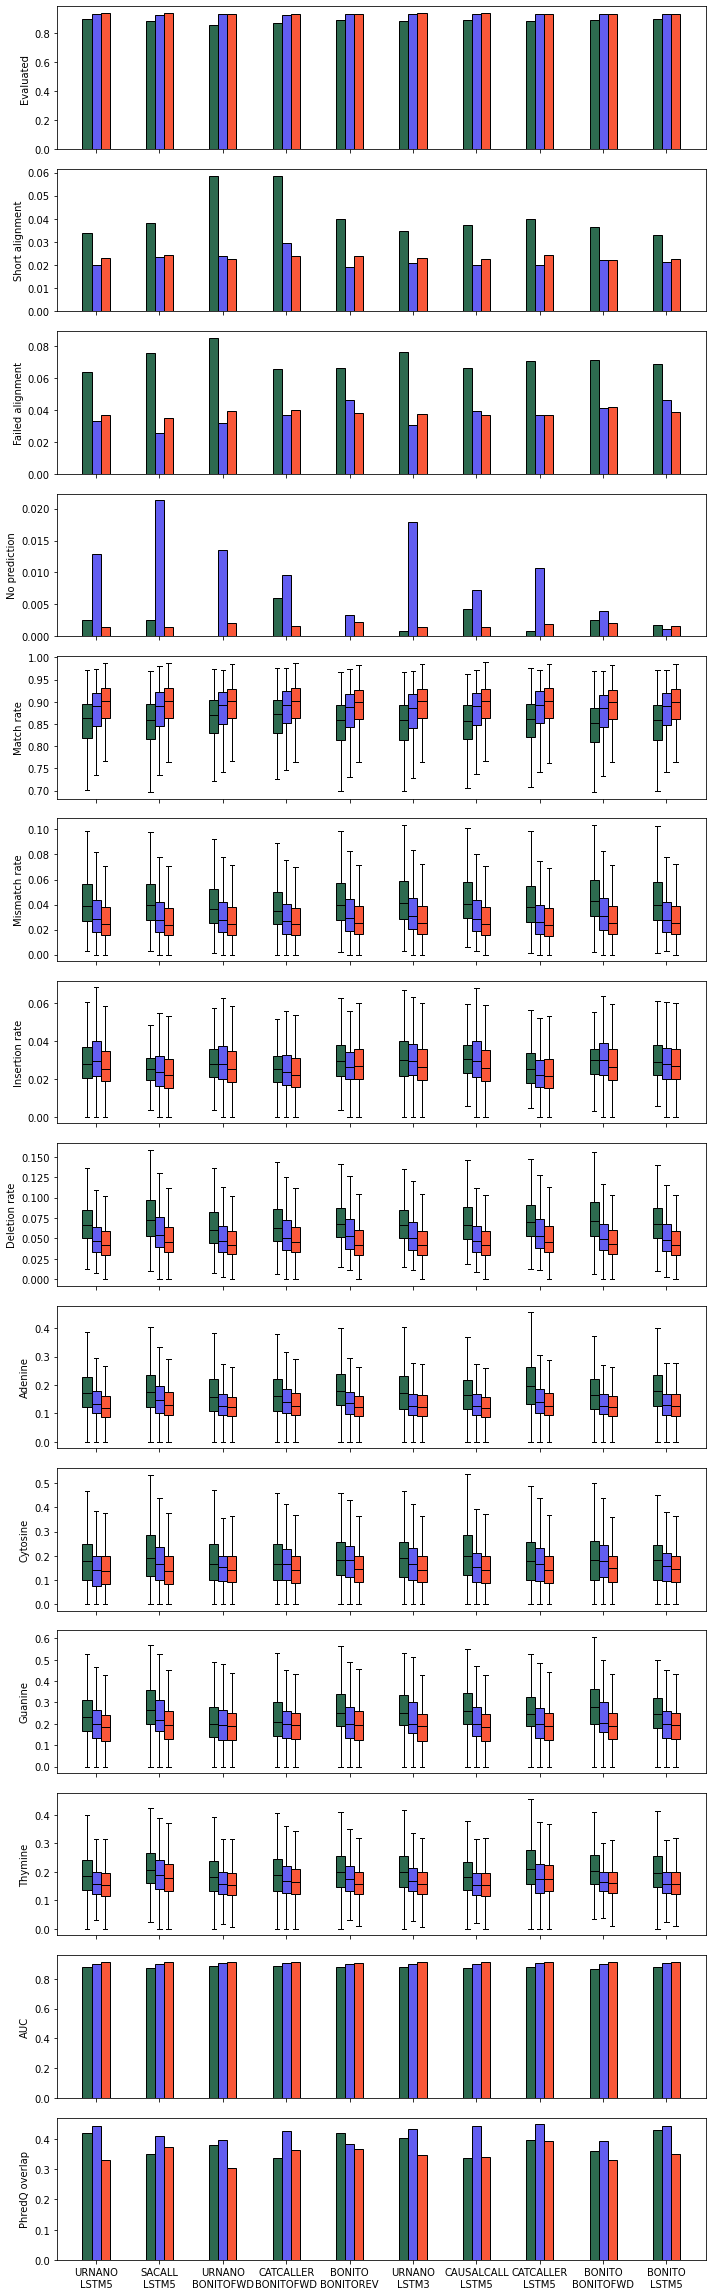

In [94]:
diff_colors = {
    'inter': {
        'd0.0': '#d8f3dc',
        'd1.0': '#b7e4c7',
        'd2.0': '#74c69d',
        'd3.0': '#40916c',
        'd4.0': '#2d6a4f',
        'dhuman': '#2d6a4f',
    },
    'global': {
        'd0.0': '#A6F7F3',
        'd1.0': '#95D1F2',
        'd2.0': '#84AAF2',
        'd3.0': '#7384F1',
        'd4.0': '#625DF0',
        'dhuman': '#625DF0',
    },
    'human': {
        'dhuman': '#f95738'
    }
}


import matplotlib.patches as mpatches


fig, axes = plt.subplots(14, 1, figsize = (10, 32), sharex = True)
model_dir_global = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/global'
model_inter_dir = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/inter'
model_human_dir = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/grid_analysis/human'

files_and_metrics = {
    '_readoutcomes': ['pass', 'shortalignment', 'failedmapping', 'noprediction'],
    '_eventrates': ['match_rate', 'mismatch_rate', 'insertion_rate', 'deletion_rate'],
    '_homopolymerrates': ['A_homo_error_rate', 'C_homo_error_rate', 'G_homo_error_rate', 'T_homo_error_rate'],
    '_singlevalues': ['auc', 'phredq_overlap'],
}

files_and_plots = {
    '_readoutcomes': 'barperc',
    '_eventrates': 'boxplot',
    '_homopolymerrates': 'boxplot',
    '_singlevalues': 'bar',
}

metric_to_plotnum = dict()
c = 0
for v in files_and_metrics.values():
    for b in v:
        metric_to_plotnum[b] = c
        c += 1

names = list()
for i, modelname in tqdm(enumerate(os.listdir(model_dir_global)), total = len(os.listdir(model_dir_global))):
    names.append(modelname.split('_')[0].upper() + '\n' + modelname.split('_')[1].upper())
    for l, (task, taskdir) in enumerate(zip(['inter', 'global', 'human'], [model_inter_dir, model_dir_global, model_human_dir])):
        for j, d in enumerate(['dhuman']):
            for file in files_and_metrics.keys():
                if task == 'human':
                    df = pd.read_csv(
                        os.path.join(
                            taskdir,
                            modelname,
                            'reports_400_1_0.1',
                            'report_'+modelname+file+'.csv'
                        ),
                        header = 0,
                        comment = '#'
                    )
                else:
                    df = pd.read_csv(
                        os.path.join(
                            taskdir,
                            modelname,
                            d,
                            'reports',
                            'report_'+modelname+file+'.csv'
                        ),
                        header = 0,
                        comment = '#'
                    )
                try:
                    total_reads = np.sum(np.array(df.iloc[:, 1:]))
                except:
                    pass
                for metric in files_and_metrics[file]:
                    k += 1
                    if files_and_plots[file] == 'barperc':
                        try:
                            v = df[metric].item()
                        except KeyError:
                            v = 0
                        axes.flatten()[metric_to_plotnum[metric]].bar(
                            x = [i+j*0.4 + l*0.15 + i*0.05], 
                            height = v/total_reads, 
                            width = 0.15,
                            color = diff_colors[task][d],
                            edgecolor = 'black'
                        )
                        axes.flatten()[metric_to_plotnum[metric]].set_xticks(np.arange(0.15, 10, 1.05))
                        axes.flatten()[metric_to_plotnum[metric]].set_ylabel(metric_rename[metric])

                    elif files_and_plots[file] == 'bar':
                        axes.flatten()[metric_to_plotnum[metric]].bar(
                            x = [i+j*0.4 + l*0.15 + i*0.05], 
                            height = [df.loc[df['metric'] == metric, 'value'].item()], 
                            width = 0.15,
                            color = diff_colors[task][d],
                            edgecolor = 'black',
                        )
                        axes.flatten()[metric_to_plotnum[metric]].set_xticks(np.arange(0.15, 10, 1.05))
                        axes.flatten()[metric_to_plotnum[metric]].set_ylabel(metric_rename[metric])
                                
                    elif files_and_plots[file] == 'boxplot':
                        stats = dict()
                        for s, v in zip(df['stats'], df[metric]):
                            stats[s] = v
                        stats['fliers'] = []
                        
                        bp = axes.flatten()[metric_to_plotnum[metric]].bxp([stats], positions = [i+j*0.4 + l*0.15 + i*0.05], widths = [0.15], patch_artist = True)
                        axes.flatten()[metric_to_plotnum[metric]].set_xticks(np.arange(0.15, 10, 1.05))
                        axes.flatten()[metric_to_plotnum[metric]].set_ylabel(metric_rename[metric])

                        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                            plt.setp(bp[element], color='black',  linewidth=1)
                        plt.setp(bp['boxes'], facecolor = diff_colors[task][d])

axes.flatten()[metric_to_plotnum[metric]].set_xticklabels(names)


legend_dict = {
    'Cross-species': '#2d6a4f',
    'Global': '#625DF0',
    'Human': '#f95738',
}

# patchList = []
# for key in legend_dict:
#    data_key = mpatches.Patch(facecolor=legend_dict[key], label=key, edgecolor = 'black')
#    patchList.append(data_key)

# fig.legend(handles=patchList, ncol = 1, title = 'Task', loc = "lower right", bbox_to_anchor=(1.05, 1))

fig.tight_layout()
fig.savefig(os.path.join(plots_dir, 'cross_vs_global_human_all_nolegend.pdf'), dpi = 600)
